In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv("../../Excel Files/rock_density_xray.csv")
df.columns = ["Signal","Density"]

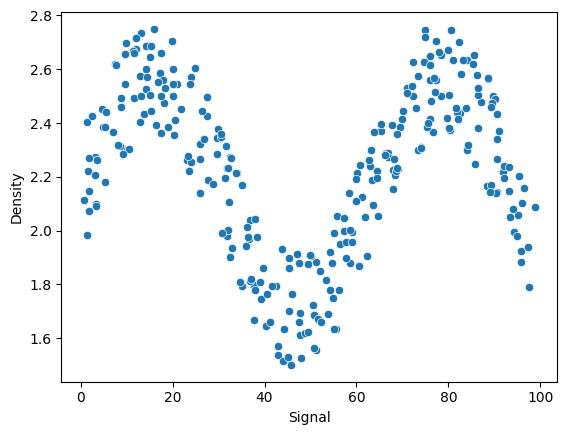

In [3]:
sns.scatterplot(x="Signal",y="Density",data=df)
plt.show()

In [4]:
X = df["Signal"].values.reshape(-1,1)
y= df["Density"] 

In [5]:
# LINEAR REGRESSION

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [7]:
from sklearn.linear_model import LinearRegression
linModel = LinearRegression()
linModel.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
linPredictions = linModel.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [10]:
MAE = mean_absolute_error(y_test,linPredictions)
MSE = mean_squared_error(y_test,linPredictions)
RMSE = root_mean_squared_error(y_test,linPredictions)
print(MAE)
print(RMSE)

0.211198973318633
0.2570051996584629


In [13]:
sigRange = np.arange(1,100)

In [15]:
sigPredictions = linModel.predict(sigRange.reshape(-1,1))

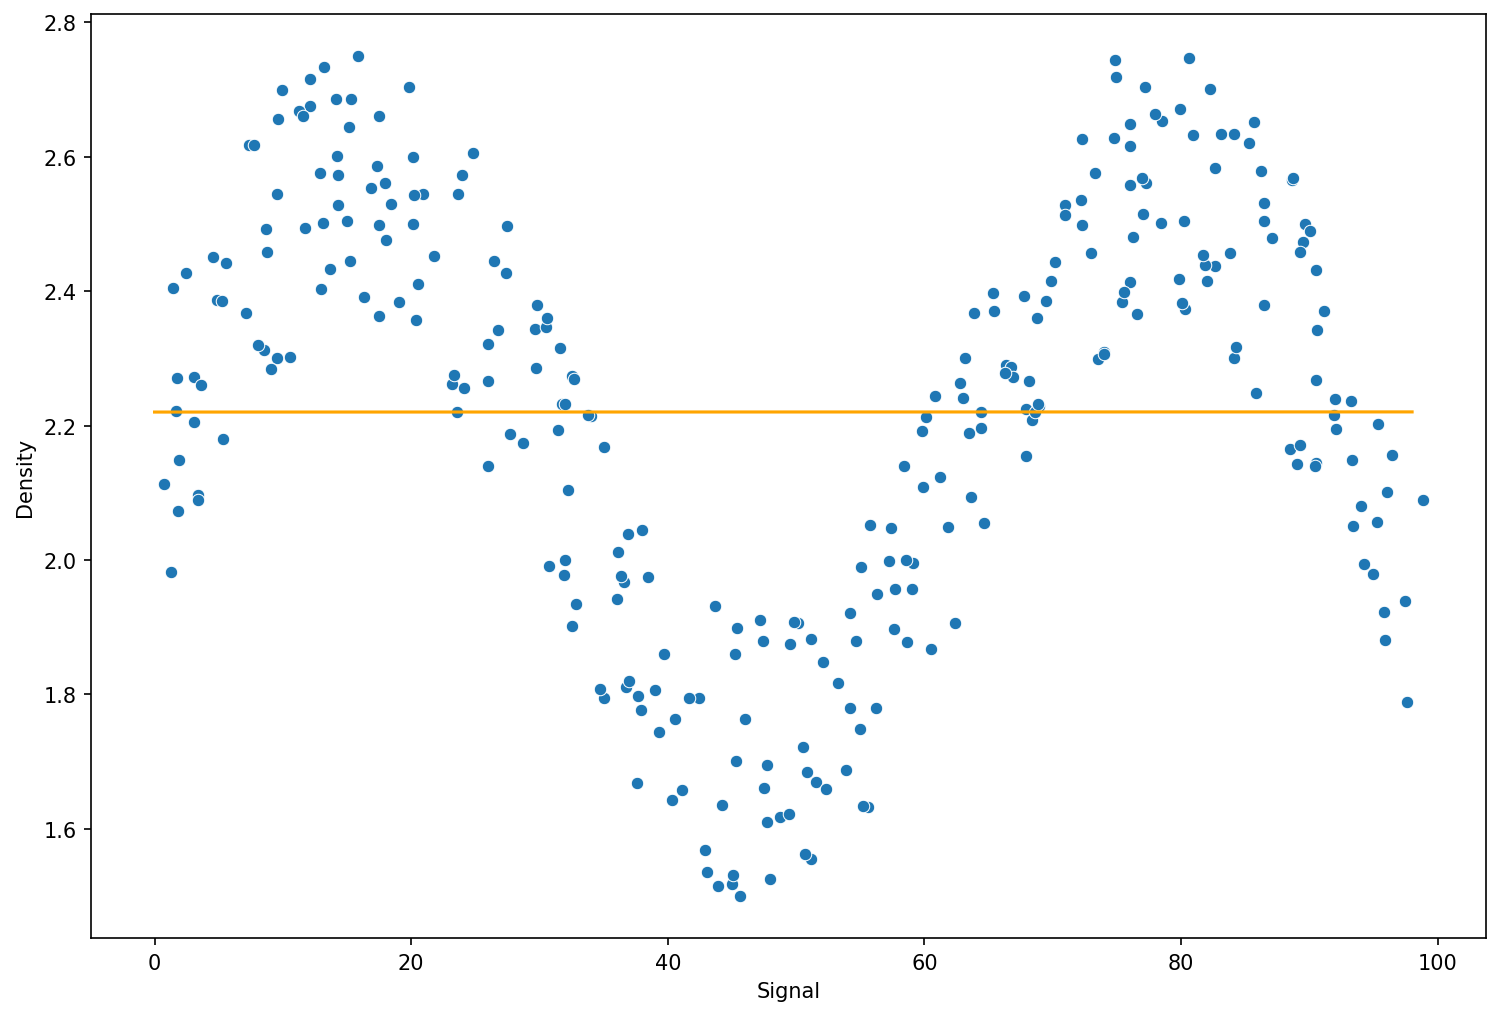

In [16]:
plt.figure(figsize=(12,8),dpi=150)
sns.scatterplot(x="Signal",y="Density",data=df)
plt.plot(sigPredictions,color="orange")
plt.show()

In [22]:
def runModel (model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
    model.fit(X_train,y_train)
    modelPredictions = model.predict(X_test)
    RMSE = root_mean_squared_error(y_test,modelPredictions)
    MAE = mean_absolute_error(y_test,modelPredictions)
    print(f"MAE:{MAE}")
    print(f"RMSE:{RMSE}")
    sigRange= np.arange(101)
    fitLine = model.predict(sigRange.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=150)
    sns.scatterplot(x="Signal",y="Density",data=df)
    plt.plot(fitLine,color="orange")
    plt.show()
    

MAE:0.211198973318633
RMSE:0.2570051996584629


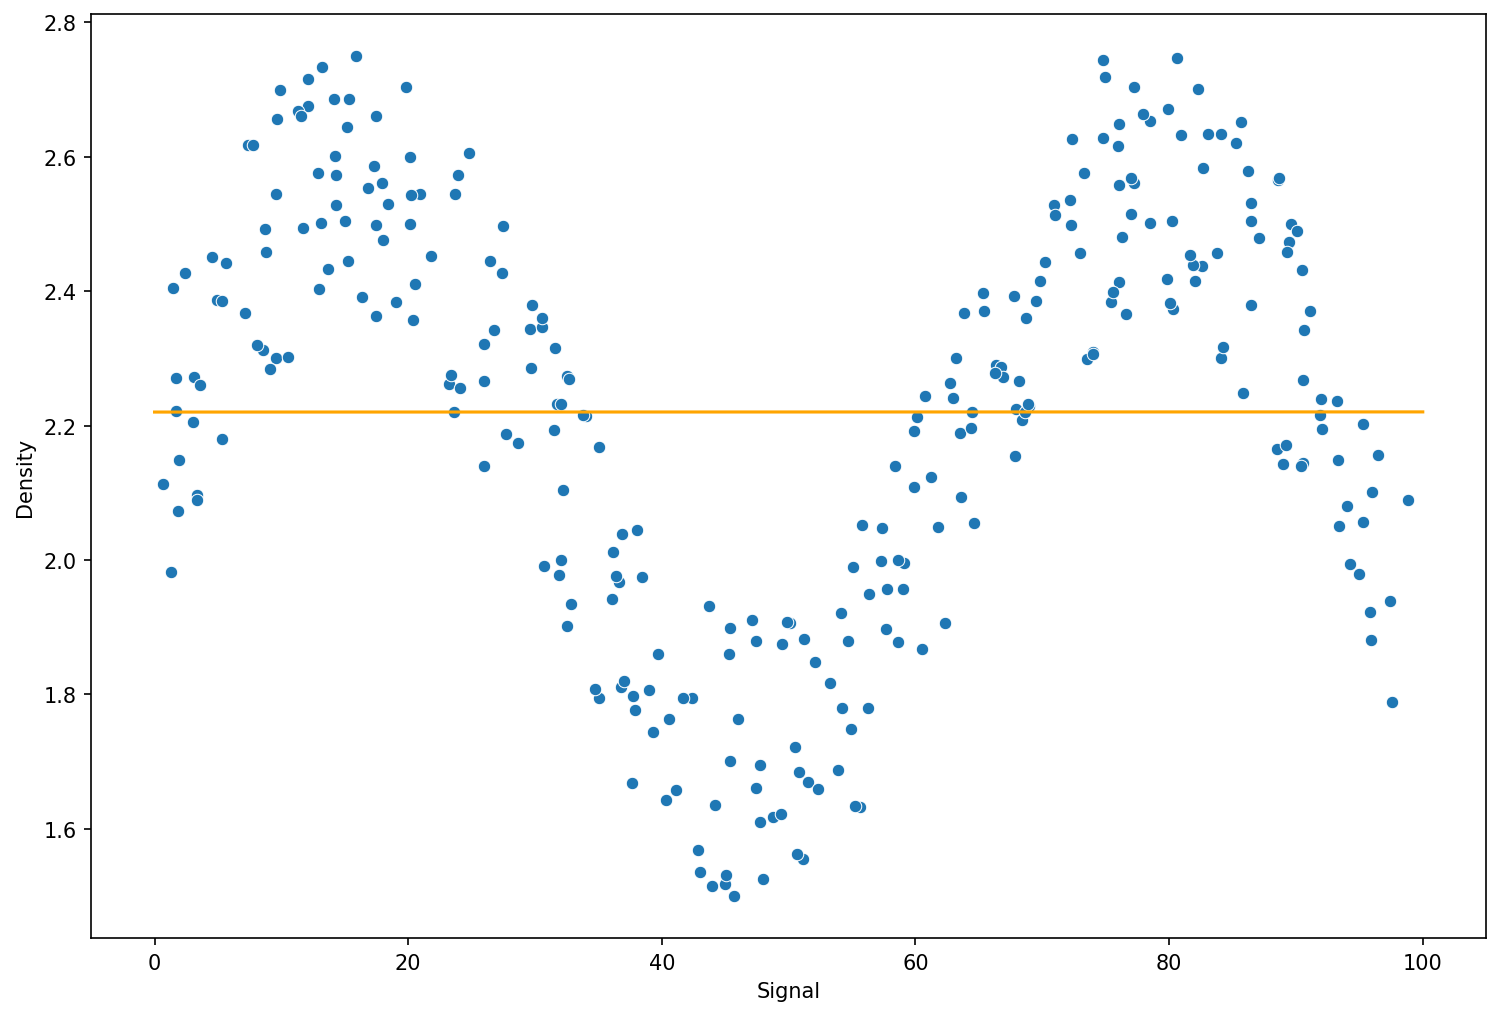

In [23]:
model = LinearRegression()
runModel(model)

In [ ]:
# POLYNOMIAL REGRESSION

MAE:0.11969168049270058
RMSE:0.13807520083403252


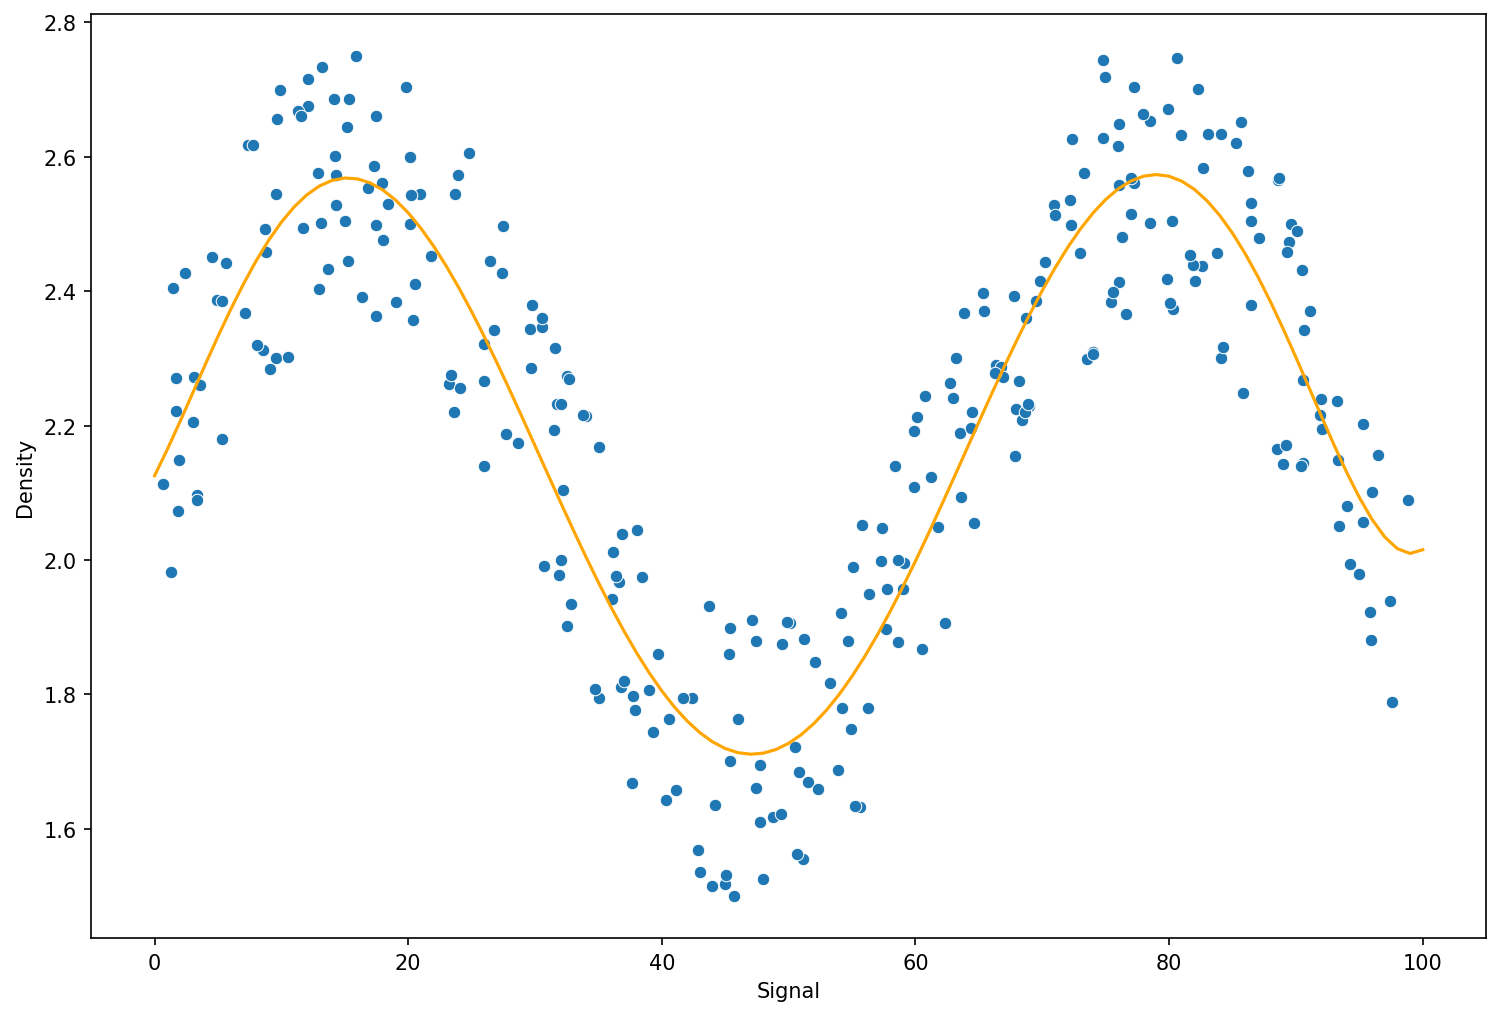

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())
runModel(pipe)

In [ ]:
# KNN Regression

In [25]:
from sklearn.neighbors import KNeighborsRegressor

MAE:0.11877297474442378
RMSE:0.1523487028635337


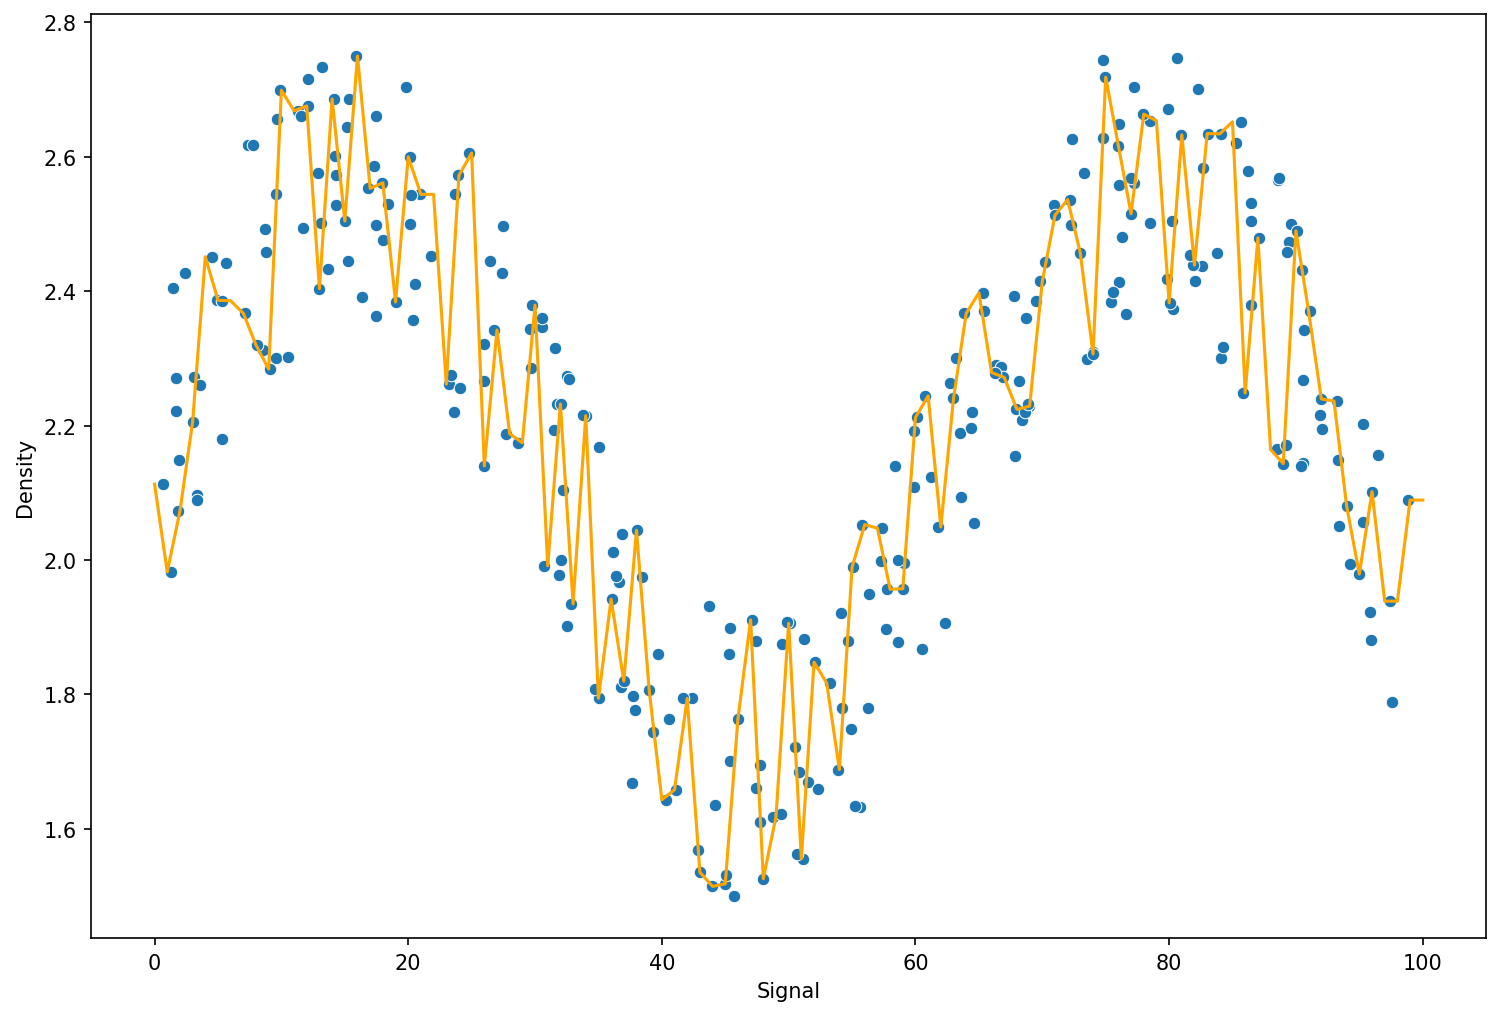

MAE:0.12198383614100558
RMSE:0.13730685016923647


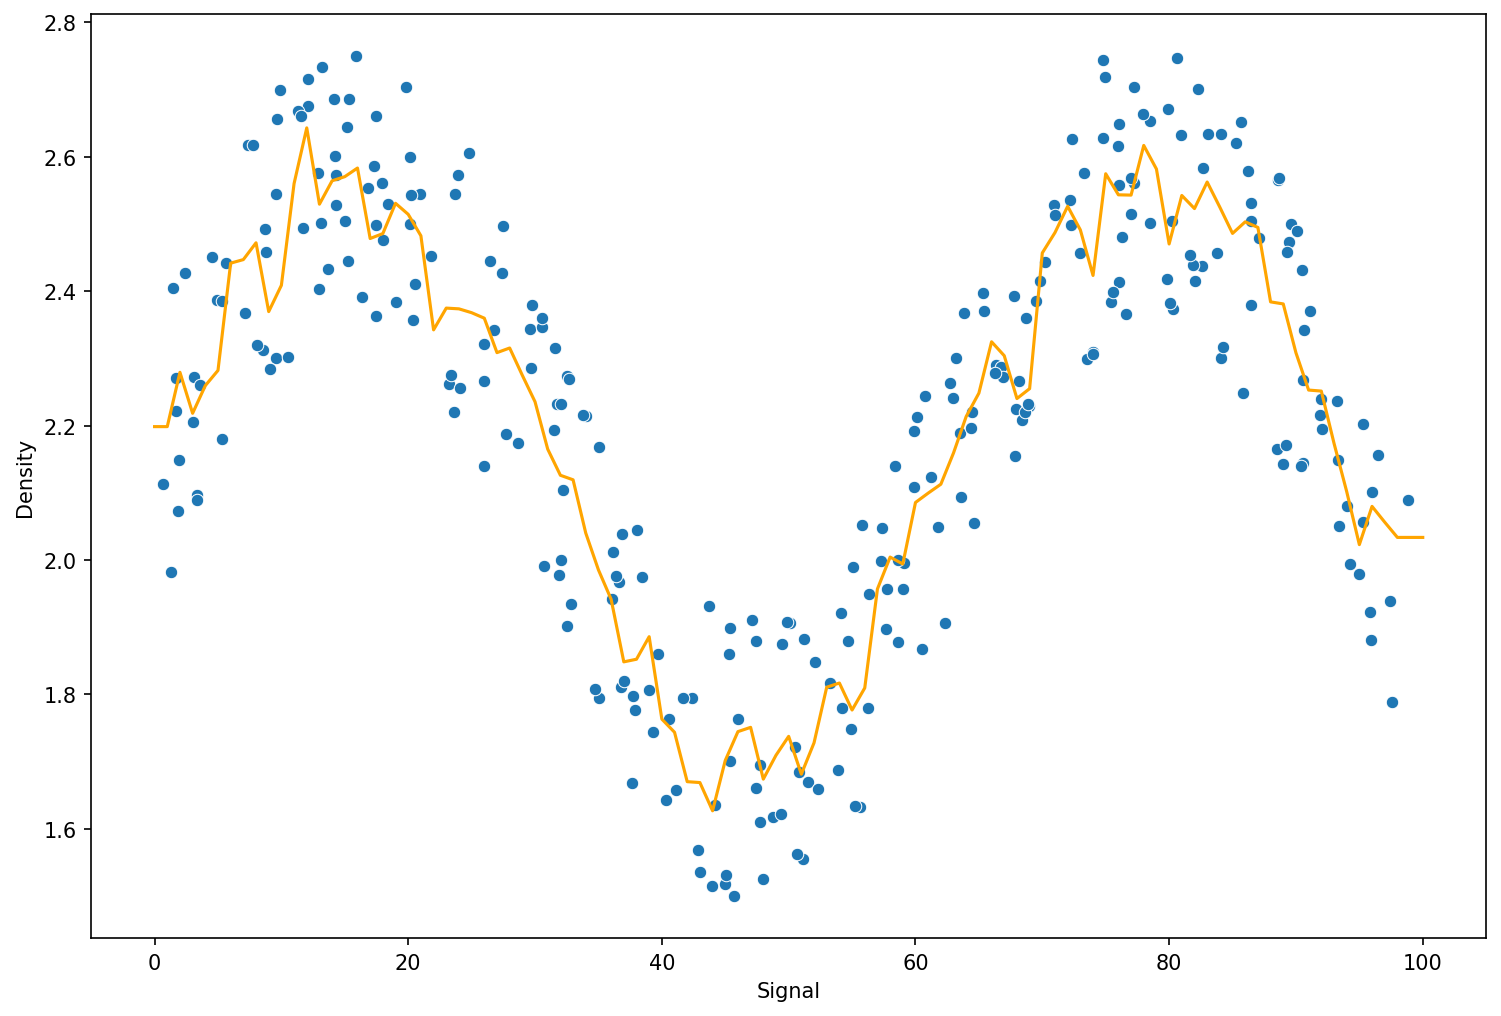

MAE:0.11635971693292672
RMSE:0.13277855732740926


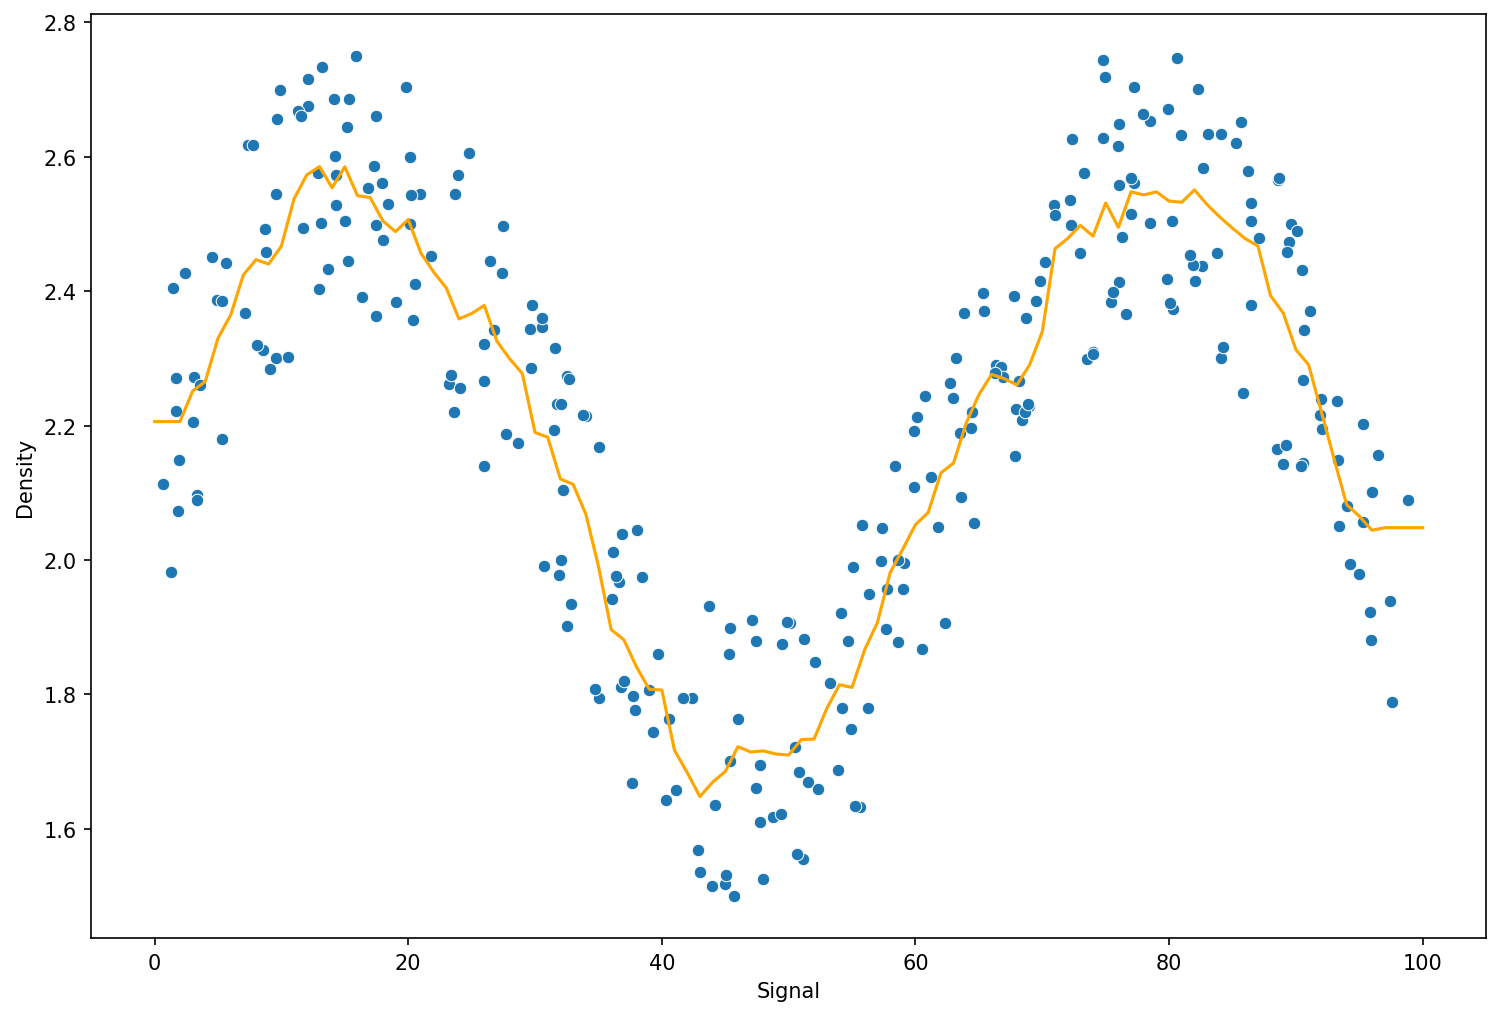

In [26]:
kValues = [1,5,10]

for n in kValues:
    knnModel = KNeighborsRegressor(n_neighbors=n)
    runModel(knnModel)

In [ ]:
# Decision Tree Regression

MAE:0.11877297474442378
RMSE:0.1523487028635337


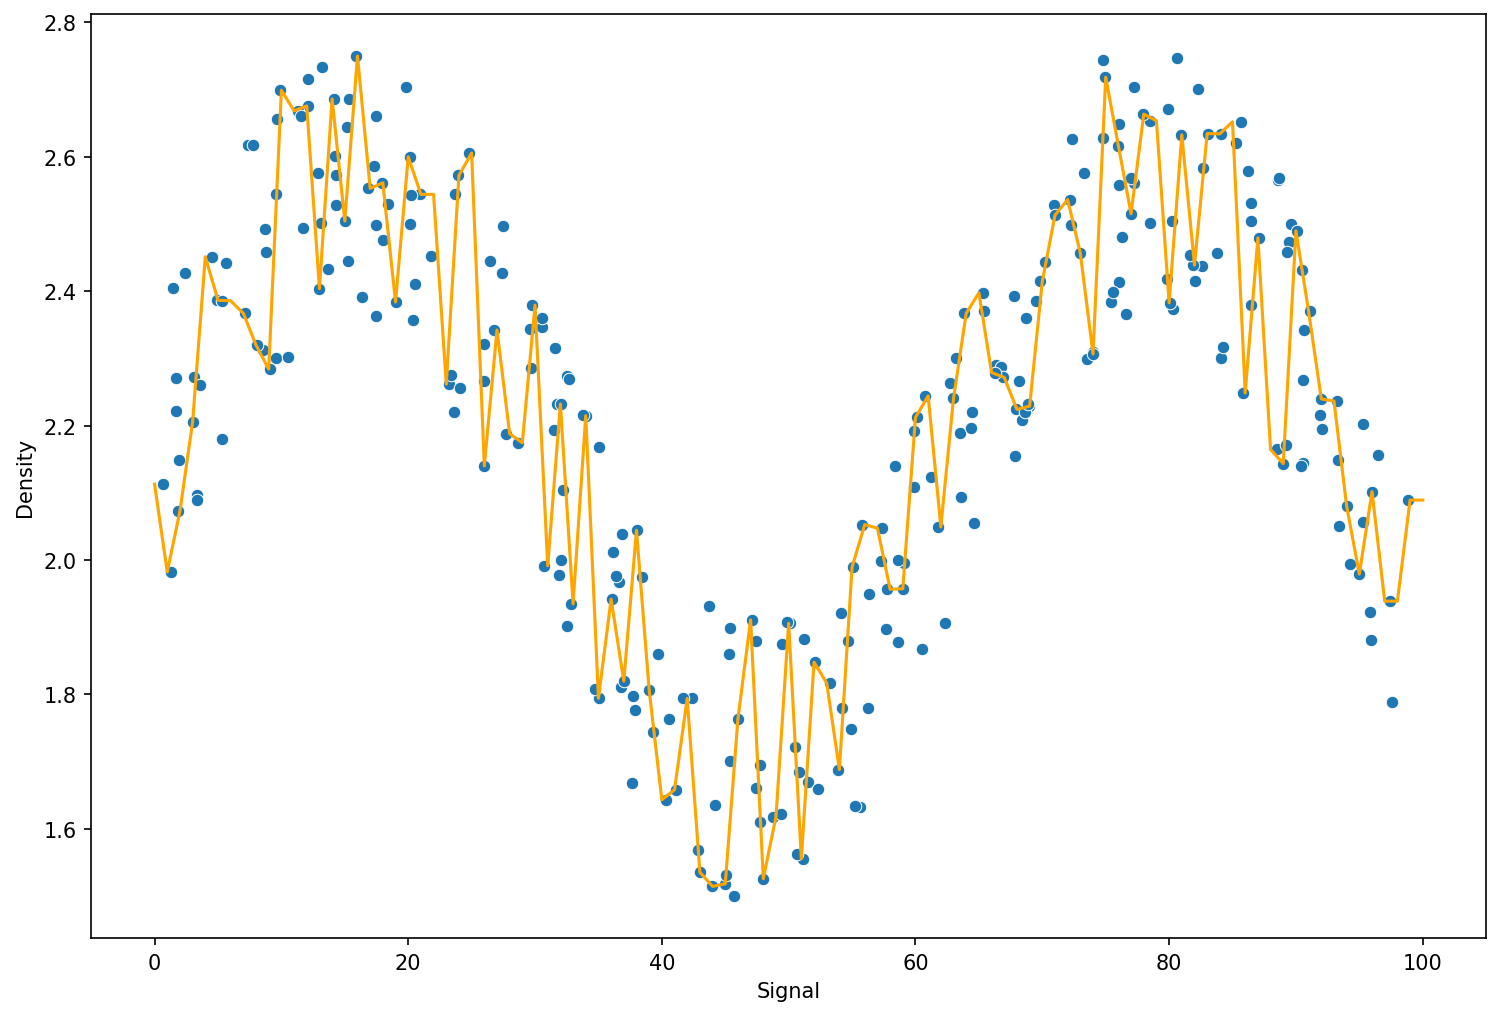

In [27]:
from sklearn.tree import DecisionTreeRegressor
decisionModel = DecisionTreeRegressor()
runModel(decisionModel)

In [ ]:
# Support Vector Regression

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

MAE:0.10854210121348368
RMSE:0.12646999302046696


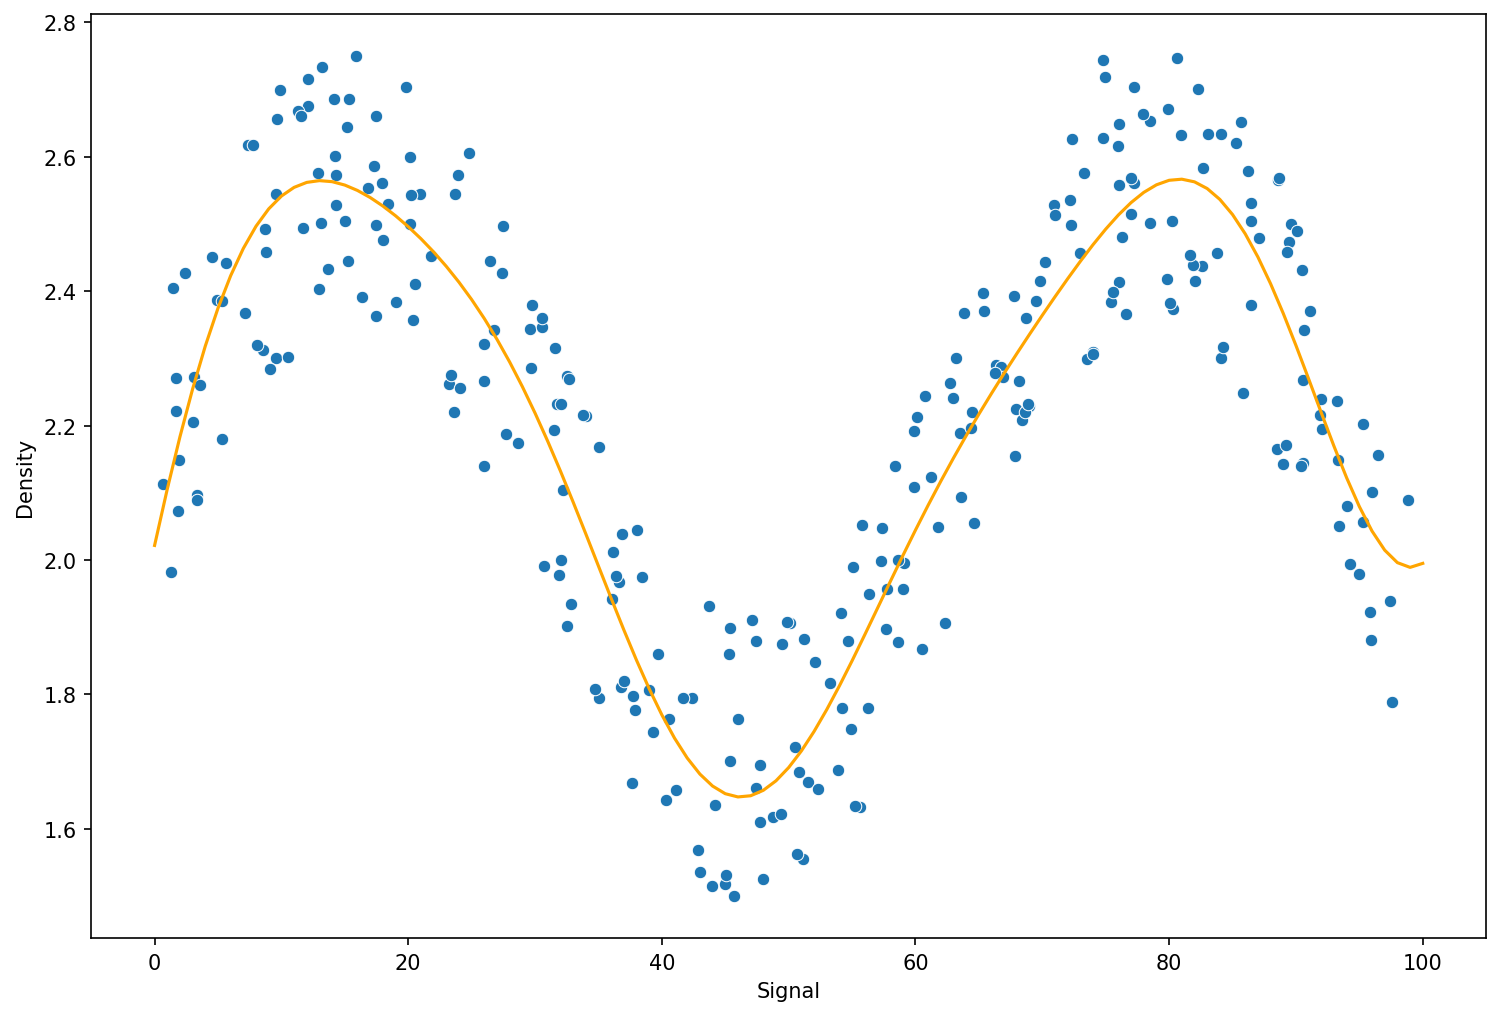

{'C': 1000, 'gamma': 'scale'}

In [32]:
svrModel = SVR()
paramGrid = {"C":[0.01,0.1,1,5,10,100,1000],
             "gamma":["auto","scale"]}
gridModel = GridSearchCV(svrModel,paramGrid)
runModel(gridModel)

In [ ]:
# Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor

MAE:0.11367622361294484
RMSE:0.13433732156642986


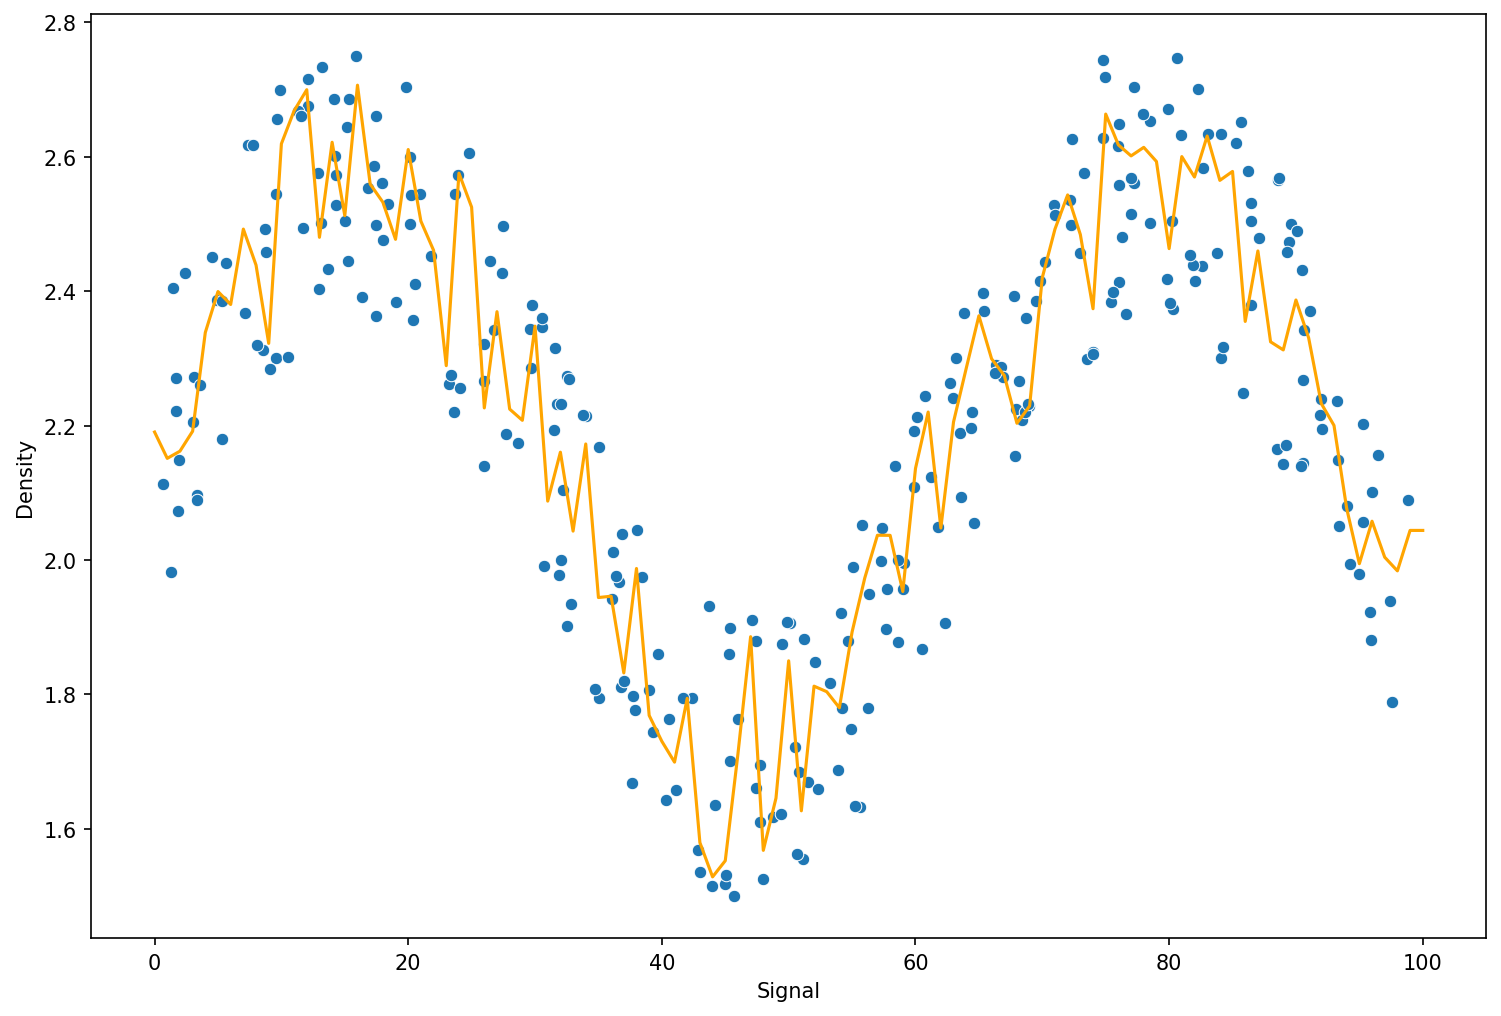

In [34]:
randonForestModel = RandomForestRegressor(n_estimators=10)
runModel(randonForestModel)

In [ ]:
# Gradient Boosting Method

In [35]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

MAE:0.11318284854800689
RMSE:0.13294148649584667


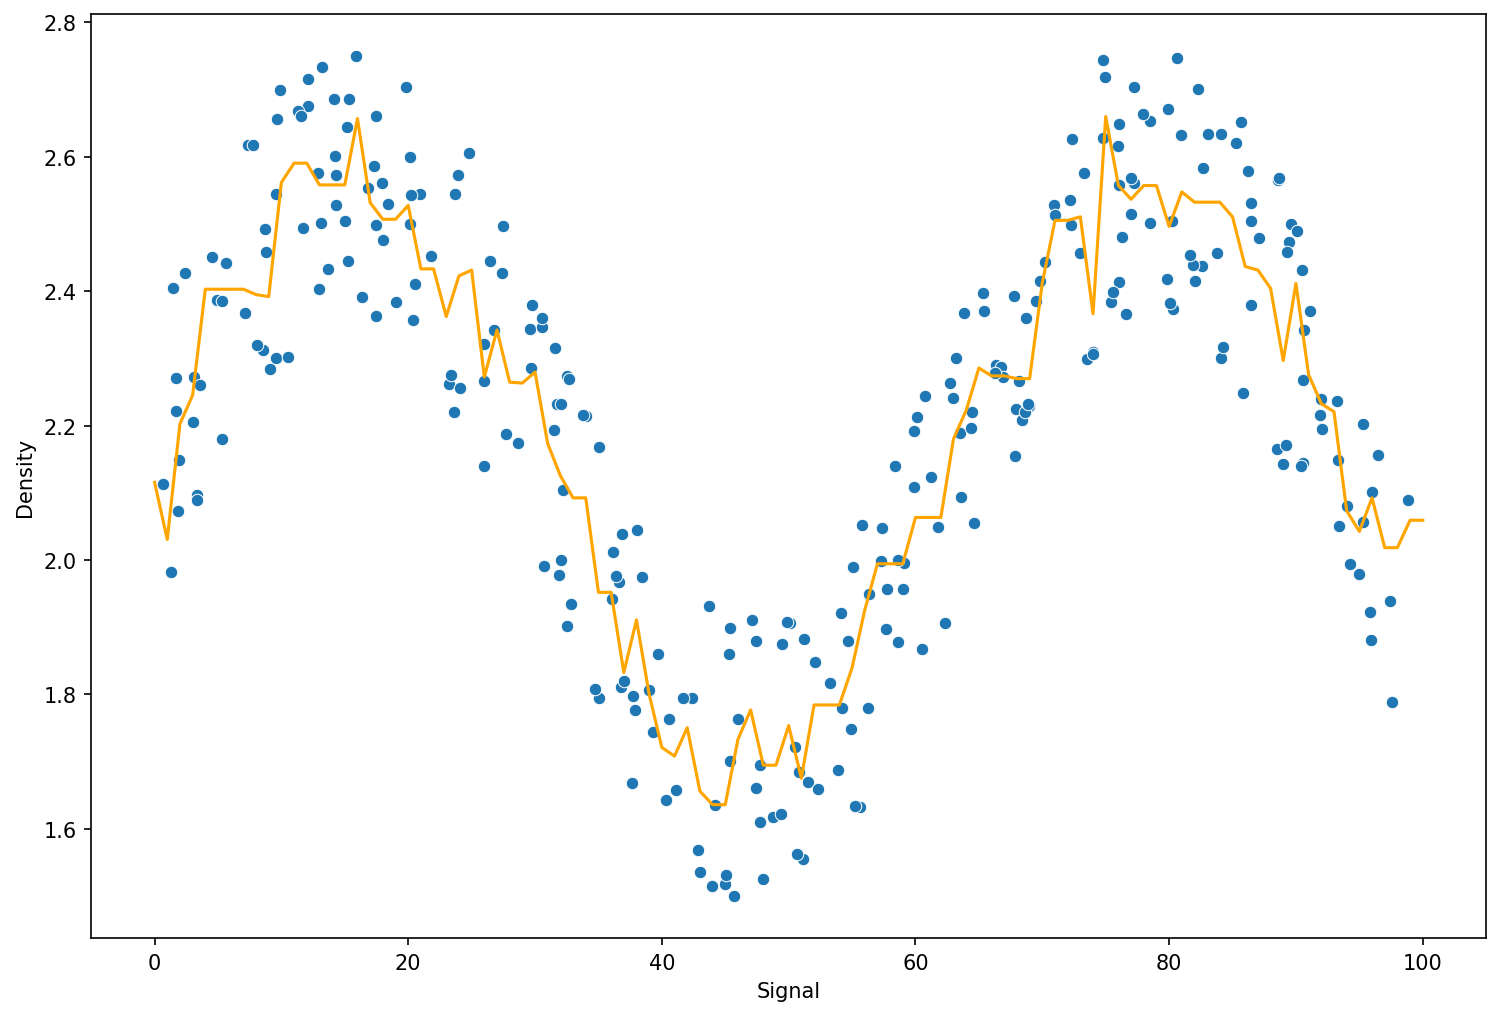

In [36]:
gbModel = GradientBoostingRegressor()
runModel(gbModel)

MAE:0.1201720781738674
RMSE:0.13579897050743106


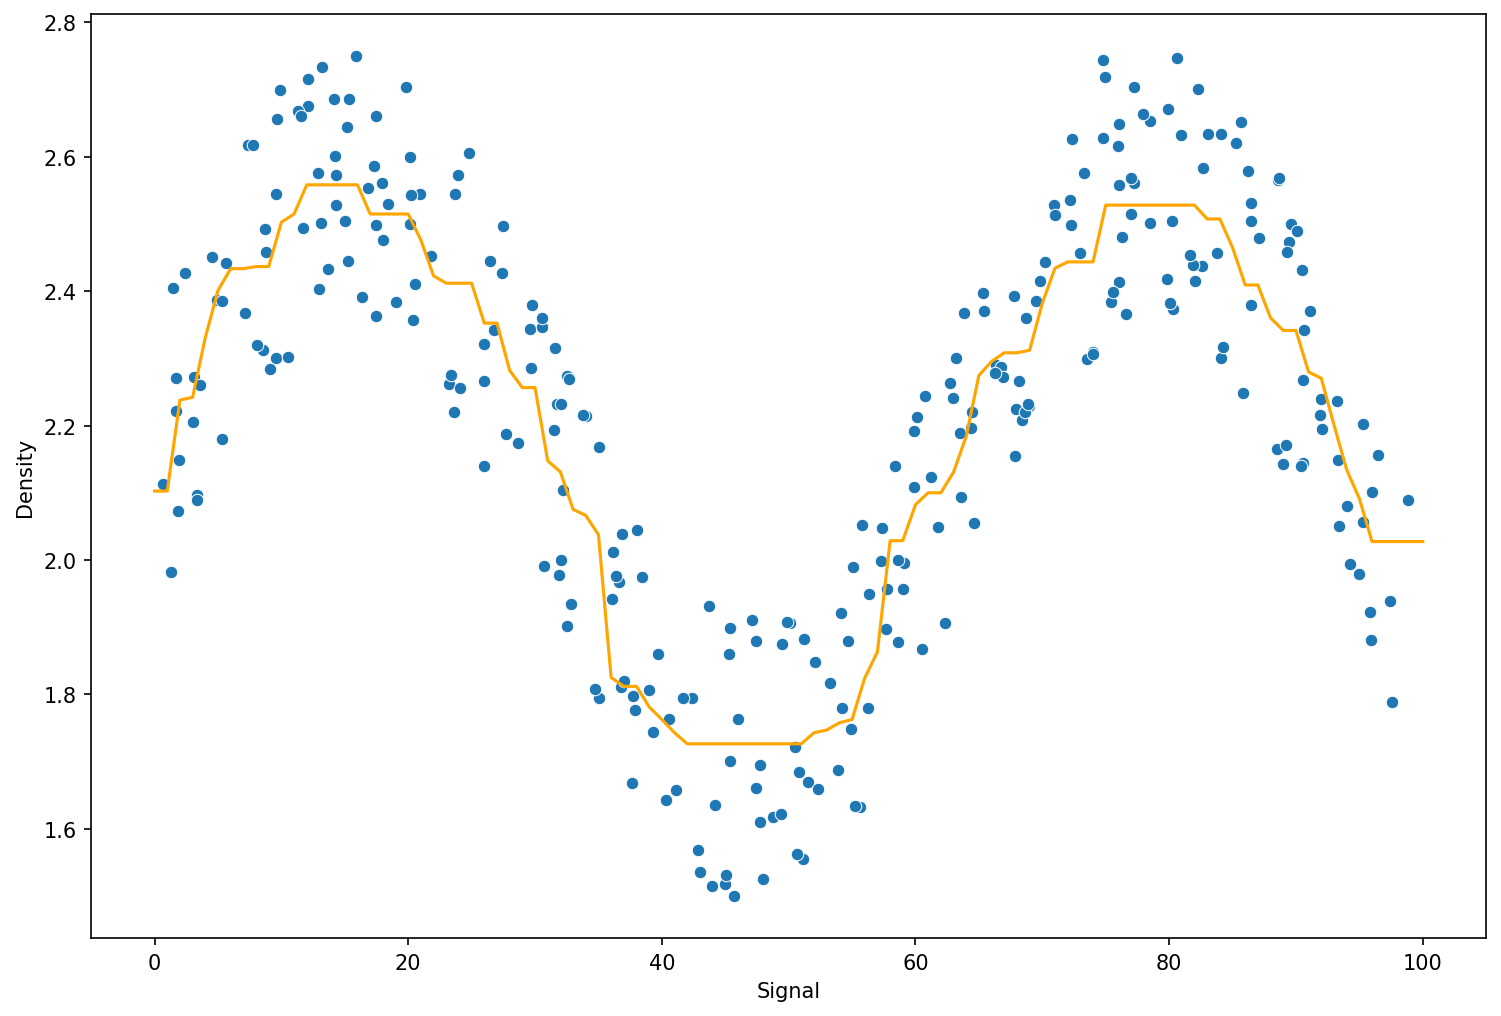

In [38]:
gbModel = AdaBoostRegressor()
runModel(gbModel)